<a href="https://colab.research.google.com/github/Logkesh/Number-Prediction/blob/main/Number_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [45]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

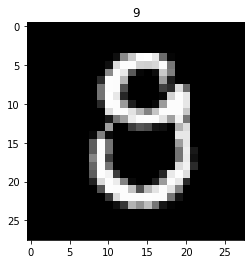

In [46]:
plt.imshow(x_train[80], cmap='gray' )
plt.title(y_train[80])
plt.show()

In [56]:
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten
from keras.models import Sequential

In [57]:
m = Sequential()
m.add(Conv2D(filters=4, kernel_size=(5,5), input_shape = (28,28,1)))
m.add(AveragePooling2D(pool_size=(2,2)))
m.add(Conv2D(filters=4, kernel_size=(7,7), input_shape = (28,28,1)))
m.add(AveragePooling2D(pool_size=(2,2)))

m.add(Flatten())
m.add((Dense(units = 10, activation='softmax')))

In [58]:
m.compile(loss="sparse_categorical_crossentropy",optimizer = 'adam', metrics = ['acc'])

In [59]:
  m.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 4)         104       
_________________________________________________________________
average_pooling2d_4 (Average (None, 12, 12, 4)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 4)           788       
_________________________________________________________________
average_pooling2d_5 (Average (None, 3, 3, 4)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                370       
Total params: 1,262
Trainable params: 1,262
Non-trainable params: 0
____________________________________________________

In [54]:
x_train = x_train.reshape(-1,28,28,1)

x_test = x_test.reshape(-1,28,28,1)

In [60]:
m.fit(x_train,y_train,epochs = 1, batch_size = 1)

60000/60000 [==============================] - 110s 2ms/step - loss: 0.8730 - acc: 0.8059


In [63]:
x_test.shape


(10000, 28, 28, 1)

In [ ]:
m.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.4678 - acc: 0.8698


[0.46781888604164124, 0.8697999715805054]

In [26]:
test = x_test.reshape(-1,28,28,1)

Text(0.5, 1.0, 'Predicted Value: 8')

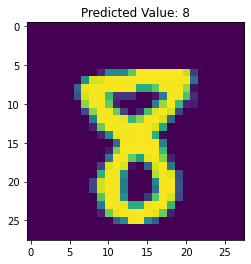

In [124]:
t = x_test[128]
plt.imshow(t.reshape(28,28))
t = t.reshape(-1,28,28,1)
prediction = (m.predict(t) > 0.7)[0]
for i in range(0,len(prediction)):
  if(prediction[i]): break
plt.title("Predicted Value: "+str(i))